In [20]:
import matplotlib.pyplot as plt
import numpy as np
from helpers_plot import initPlot, finalizePlot
initPlot()

In [21]:
Npix=64
Side=2
NpixInner=32
data=np.loadtxt("../scripts/cov_whiteNoise_npix"+str(Npix)+"_side"+str(Side)+"_inner"+str(NpixInner)+".dat")

In [22]:
N=len(data)
term1=data[:,-3]
term2=data[:,-2]
total=data[:,-1]
print(N)

10


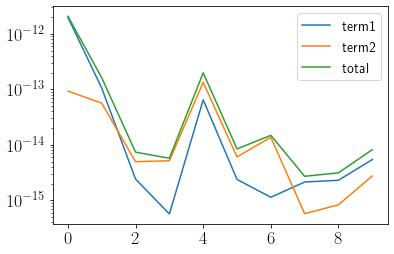

In [23]:
plt.yscale('log')
plt.plot(term1, label="term1")
plt.plot(term2, label="term2")
plt.plot(total, label="total")
plt.legend()
plt.show()

In [24]:
def make_sym_matrix(n,vals):
  m = np.zeros([n,n], dtype=np.double)
  xs,ys = np.triu_indices(n)
  m[xs,ys] = vals
  m[ys,xs] = vals

  return m

In [25]:
thetas=[[2,2,2], [2,2,8], [2,8,8], [8,8,8]]
labels=["2', 2', 2'", "2', 2', 8'", "2', 8', 8'", "8', 8', 8'"]

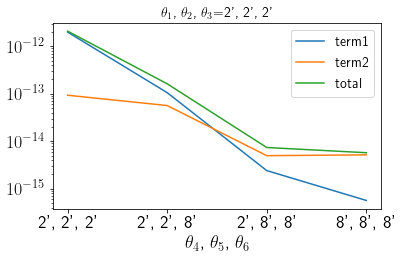

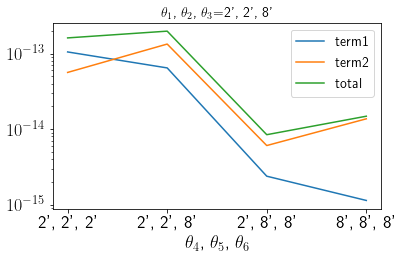

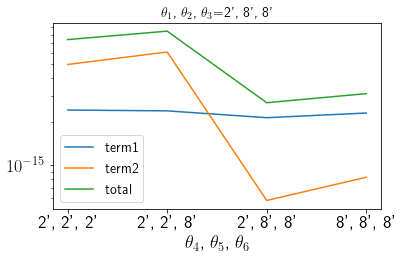

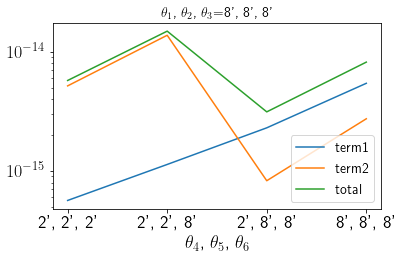

In [26]:
term1_mat=make_sym_matrix(4, term1)
term2_mat=make_sym_matrix(4, term2)
total_mat=make_sym_matrix(4, total)

for i,line in enumerate(term1_mat):
    fig, ax=plt.subplots()
    ax.set_yscale('log')
    ax.set_title(r"$\theta_1$, $\theta_2$, $\theta_3$="+"{}', {}', {}'".format(thetas[i][0], thetas[i][1], thetas[i][2]))
    ax.plot(line, label="term1")
    ax.plot(term2_mat[i], label='term2')
    ax.plot(total_mat[i], label='total')
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(labels)
    ax.set_xlabel(r"$\theta_4$, $\theta_5$, $\theta_6$")
    finalizePlot(ax, outputFn="cov_"+str(thetas[i][0])+str(thetas[i][1])+str(thetas[i][2])+"_npix"+str(Npix)+"_side"+str(Side)+"_inner"+str(NpixInner)+".png")

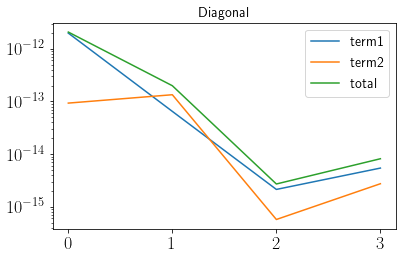

In [27]:
fig, ax=plt.subplots()
ax.set_title("Diagonal")
ax.set_yscale('log')
ax.plot(np.diag(term1_mat), label='term1')
ax.plot(np.diag(term2_mat), label="term2")
ax.plot(np.diag(total_mat), label="total")
finalizePlot(ax, outputFn="cov_diag_npix"+str(Npix)+"_side"+str(Side)+"_inner"+str(NpixInner)+".png")
